# **Riduzione della Dimensionalità**

## Dataset MNIST_784: Panoramica

Il dataset **MNIST_784** è un dataset molto popolare di cifre scritte a mano, ampiamente utilizzato in machine learning e deep learning per **classificazione di immagini**.

## Caratteristiche Chiave:
**Tipo di dati**: Immagini

* **Contenuto**: Cifre scritte a mano (da 0 a 9)

* **Numero di Campioni**: 70.000 immagini

* **Dimensione Immagine**: 28x28 pixel (appiattite in 784 caratteristiche per campione) 

* **Caratteristiche delle Immagini**: Ogni immagine è rappresentata come un array 1D di 784 valori di intensità dei pixel (scala di grigi)

* **Classi**: 10 classi (cifre da 0 a 9).

Il dataset può essere accessibile direttamente attraverso piattaforme come `scikit-learn`

## Perché "784"?

Il nome "mnist_784" fa riferimento ai 784 pixel che compongono l' immagine. Supponendo infatti di calcolare quanti pixel contiene la singola immagine troviamo che:

**28 x 28 = 784**


Digitalmente un' immagine è una **matrice** contenente valori numerici discreti nell' intervallo [0, 255] che rappresentano **l' intensità del pixel** in scala di grigi. 

Per quanto riguarda le immagini a colori viene introdotta una terza dimensione che è il **canale**. Tipicamente un' immagine a colore è in formato **RGB (Red, Green, Blue)** e possiede 3 canali. 

Un pixel sarà quindi la combinazione del valore di Rosso, Verde e Blu per quel singolo pixel.

Nel caso del dataset **mnist_784** ogni singola immagine viene considerata come vettore unidimensionale (1D), in cui tutti i pixel vengono allineati.

Per semplicità consideriamo un' immagine di risoluzione 3x3:

```
 [255, 128, 64]
 [ 0, 128, 192]
 [ 64, 255,  0]
```

Se trasformo l' immagine in un vettore unidimensionale ottengo:

```
[255, 128, 64, 0, 128, 192, 64, 255, 0]
```

In [146]:
import numpy as np
from sklearn.datasets import fetch_openml

# 1: Carichiamo il dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False,parser='auto')
X = mnist.data
y = mnist.target.astype(int)

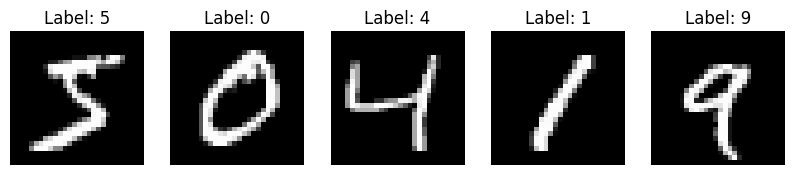

In [147]:
import matplotlib.pyplot as plt

# Funzione per stampare alcune immagini
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images): 
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray') 
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Decidiamo il numero di immagini da visualizzare e stampiamole utilizzando la funzione display_images
num_samples = 5
display_images(X[:num_samples], y[:num_samples], num_images=num_samples)


### **Metodo `.shape`**

Un metodo molto utile degli array, soprattutto nel caso di array molto grandi, è:

- [numpy.shape](https://numpy.org/doc/2.1/reference/generated/numpy.shape.html): Stampa le dimensioni di un array.

In [148]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

a.shape

(2, 5)

## **Principal Component Analysis (PCA)**

La **PCA** è una tecnica utilizzata per ridurre la dimensionalità dei dati preservando la maggior parte della variazione presente nel dataset originale. 

L'obiettivo della PCA è trasformare i dati in un nuovo sistema di coordinate, in cui le prime componenti principali catturano la maggior parte della varianza. Questo può semplificare l'analisi e la visualizzazione dei dati, riducendo il rumore e migliorando l'efficienza computazionale.

### **Come si usa la PCA?**

Per applicare la PCA ci sono degli step da seguire:

1. **Standardizzazione dei dati**: Per rendere le features comparabili tra loro viene eseguita la standardizzazione.

2. **Calcolo della matrice della covarianza**: rappresente la variazione di ogni variabile rispetto alle altre (inclusa se stessa).

3. **Calcolo degli autovalori e autovettori**: Vengono calcolati gli autovalori della matrice di covarianza, che rappresentano la varianza espressa dalle componenti principali, e gli autovalori, che rappresentano le direzioni delle componenti principali. 

4. **Ordinamento**: Si ordnano gli autovalori (e i corrispettivi autovettori) in ordine decresente in base alla varianza espressa.

5. **Selezione delle top-n componenti**: Si scelgono il numero di componenti desiderato che più esprimono varianza.

6. **Trasformazione dei dati**: SI proiettano i dati lungo le componenti principali scelte, ottenendo la riduzione di dimensione desiderata.

## **Step 1 - Standardizzazione**

Per standardizzare i dati applichiamo la **Z-normalization** che consiste nel trasformare i dati in modo che abbiano:

    - media = 0
    - deviazione standard = 1

Per fare ciò utilizzeremo le funzioni di numpy:

- [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): Calcola la media lungo un asse specifico.
- [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html): Calcola la deviazione standard lungo un asse specifico.

### **Broadcasting**

Prima di procedere però osserviamo una proprietà fondamentale che offre NumPy. 

In [149]:
prezzi = np.array([100, 200, 300, 400])  # Array NumPy
sconto = 0.10  # Valore scalare

prezzi_scontati = prezzi - prezzi * sconto  # Broadcasting automatico

print(prezzi_scontati)

[ 90. 180. 270. 360.]


In [150]:
voti = np.array([[80, 85, 90], 
                 [75, 80, 95], 
                 [60, 70, 80]])  # 3 studenti con 3 voti ciascuno

bonus = np.array([5, 10, 15])  # Bonus per ogni materia

voti_finali = voti + bonus  # Broadcasting applicato!

print(voti_finali)

[[ 85  95 105]
 [ 80  90 110]
 [ 65  80  95]]


Notiamo inoltre come in alcune funzioni di NumPy è possibile specificare l' **asse** lungo cui applicarle. Specificando l' asse tra gli argomenti della funzione possiamo ottenere diversi risultati.

In [151]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

# Calcoliamo la media di A

mean_A = np.mean(A, axis=0) # axis = 0 indica che vogliamo calcolare la media sulle colonne
                            # axis = 1 indica che vogliamo calcolare la media sulle righe
                            # axis = None indica che vogliamo calcolare la media su tutti gli elementi

print(f'Media di A: {mean_A}')

Media di A: [4. 5. 6.]


In [152]:
# Calcoliamo la media dei dati
# svolgimento...

mean_X = np.mean(X, axis=0)
print(f'Medie di X: {mean_X.shape}')

# Sottraggo la media da ogni riga di X
# svolgimento...

X2 = X - mean_X
print(f'Nuovo vettore di X: {X2.shape}')

# Calcoliamo la deviazione standard dei dati centrati
# svolgimento...

std_X = np.std(X, axis=0)
print(f'Deviazione standard di X: {std_X.shape}')

# Per standardizzare i dati utilizzo la formula: dati_centrati / deviazione_standard * 1e-6
# 1e-6 è un valore piccolo aggiunto per evitare divisioni per zero
# svolgimento...

newX = X2 / (std_X + 1e-6)
print(f'Nuova di X: {newX.shape}')

Medie di X: (784,)
Nuovo vettore di X: (70000, 784)
Deviazione standard di X: (784,)
Nuova di X: (70000, 784)


## **Step 2 - Calcolo della matrice di covarianza**

Per calcolare la matrice di covarianza utilizziamo la funzione di NumPy:

- [numpy.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html): Calcola la matrice di covarianza dei dati.

In [153]:
# Calcoliamo la matrice di covarianza utilizzando la funzione np.cov a cui dobbiamo passare come parametro i dati standardizzati.

# N.B. la funzione np.cov richiede di default tratta le righe come variabili e le colonne come osservazioni
# nel nostro caso vogliamo fare il contrario, quindi dobbiamo specificare il parametro rowvar=False

# svolgimento...

cov_X = np.cov(newX, rowvar = False)
print(f'Matrice di covarianza', cov_X.shape)

Matrice di covarianza (784, 784)


## **Step 3 - Calcolo degli autovalori e autovettori**

Per calcolare autovalori e autovettori utilizziamo la funzione di NumPy:

- [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html): Calcola autovalori e autovettori di una matrice simmetrica.

In [154]:
# Calcoliamo gli autovalori e autovettori della matrice di covarianza. Utilizziamo la funzione np.linalg.eigh a cui passiamo come parametro la matrice di covarianza.

# N.B. la funzione np.linalg.eigh restituisce una tupla con due elementi, rispettivamente:
# - un array con gli autovalori in ordine crescente
# - una matrice con gli autovettori corrispondenti
# a noi interessa salvarli entrambi in due variabili distinte

# svolgimento...

eigen_X = np.linalg.eigh(cov_X)
eigenval_X = eigen_X.eigenvalues
eigenvect_X = eigen_X.eigenvectors
print(f'Autovalori: {eigenval_X.shape}')
print(f'Autovettori: {eigenvect_X.shape}')

Autovalori: (784,)
Autovettori: (784, 784)


## **Step 4 - Ordinare gli autovalori e autovettori**

Per ordinare gli autovalori e autovettori in ordine decrescente utilizziamo la funzione di NumPy:
- [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html): Ritorna gli indici degli autovalori ordinati in ordine crescente.

Poichè a noi interessa l' ordine decrescente, dobbiamo invertire questi indici. Vediamo di seguito un modo veloce e compatto per farlo.

In [155]:
lista = [1, 2, 3, 4, 5]

# La notazione di slicing [::-1] segue il ormato [start:stop:step]:
# - start: indice di partenza
# - stop: indice di fine
# - step: passo
# Se non specifico start e stop, vengono considerati tutti gli elementi
# Se specifico step = -1, vengono considerati gli elementi in ordine inverso

lista_invertita = lista[::-1]

print("Lista originale:", lista)
print("Lista invertita:", lista_invertita)

Lista originale: [1, 2, 3, 4, 5]
Lista invertita: [5, 4, 3, 2, 1]


In [156]:
# Sulla base dell' esempio fatto sopra e con la funzione np.argsort ordiniamo in ordine decrescente gli autovalori.
# Lo stesso ordinamento deve essere poi eseguito anche sugli autovettori.

# Estraiamo gli indici degli autovalori ordinari in ordine decrescente

# svolgimento...

flipped_index_eigenval_X = np.flip(np.argsort(eigenval_X))

# Ordiniamo gli autovalori utilizzando i nuovi indici

# svolgimento...

sorted_eigenval_X = eigenval_X[flipped_index_eigenval_X]

# Ordiniamo gli autovettori utilizzando i nuovi indici
# N.B. Nella matrice degli autovalori ogni colonna rappresenta un autovettore, quindi dobbiamo ordinare le colonne e non le righe.

# svolgimento...

sorted_eigenvect_X = eigenvect_X[:, flipped_index_eigenval_X]


## **Step 5 - Selezionare le top-n componenti**

Selezioniamo le top-n componenti che esprimono maggiore varianza nel dataset. In generale, per avere una migliore rappresentazione grafica del dataset si scelgono le migliori 2 componenti.

In [157]:
# Selezioniamo il numero di componenti che vogliamo mantenere
n_components = 2

# Selezionare gli autovettori corrispondenti 
# ATTENZIONE: valutiamo correttamente come fare lo slicing. Dobbiamo utilizzare gli indici selezionati 
# per selezionare gli autovettori corrispondenti

# svolgimento...

selected_X = sorted_eigenvect_X[:,:n_components]

### **Calcoliamo la varianza espressa**

Calcoliamo quanta varianza viene espressa dal numero di componenti che abbiamo scelto.

In [158]:
# Per calcoalre la percentuale di varianza espressa diviamo gli autovalori selezionati 
# per la somma di tutti gli autovalori 
# Per calcolare la somma di tutti gli autovalori potrebbe essere utile utilizzare la funzione sum()

# svolgimento...

varianza_selected = np.sum(sorted_eigenval_X[:n_components])/np.sum(sorted_eigenval_X)

print(varianza_selected)

0.09683953779665677


## **Step 6 - Transformare i dati**

Riduciamo la dimensione del dataset proiettando i dati lungo le componenti principali che abbiamo calcolato. Per ottenere questo risultato utilizziamo la funzione di NumPy:

- [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): Calcola il prodotto riga colonna di due array.

In [159]:
# Proiettiamo i dati nello spazio delle componenti principali utilizzando np.dot a cui dobbiamo 
# passare come parametri i dati, e le direzioni lungo cui proiettare.
# N.B. Dobbiamo proiettare i dati standardizzati

# svolgimento...
newData = np.dot(newX, selected_X)
print(newData.shape)

(70000, 2)


## **Visualizzazione dei dati** 

Utilizzando la libreria `matplotlib` per visualizzare i dati trasformati

In [160]:
def plot_pca_2d(X_transformed, y, explained_variance):
    """
    Funzione per visualizzare i dati trasformati in 2D con PCA.

    Parametri:
    - X_transformed: array numpy con le prime due componenti principali (n_samples, 2)
    - y: array numpy contenente le etichette delle classi
    - explained_variance: float, percentuale di varianza spiegata dalle due componenti principali
    
    Output:
    - Un grafico scatter delle immagini nello spazio PCA 2D.
    """
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"2D plot of Images using PCA with {explained_variance*100:.2f}% variance")
    plt.show()


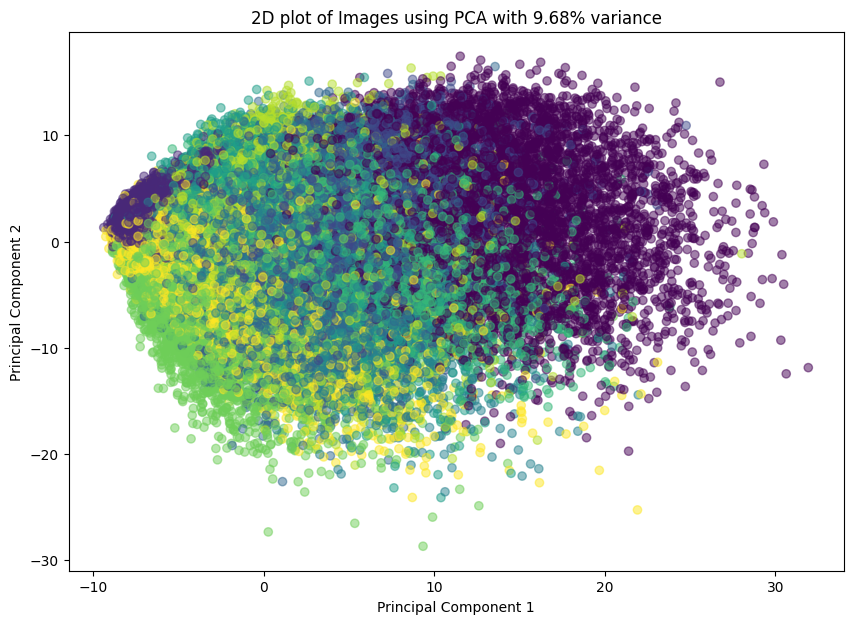

In [161]:
# Chiamare la funzione plot_pca_2d per visualizzare i dati trasformati in 2D

# svolgimento...

plot_pca_2d(newData, y, varianza_selected)

In [162]:
def plot_pca_with_images(X, X_transformed, y):
    """
    Funzione per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA.

    Parametri:
    - X: array numpy (n_samples, n_features), dataset originale con le immagini appiattite
    - X_transformed: array numpy (n_samples, 2), dataset proiettato sulle prime due componenti principali della PCA
    - y: array numpy contenente le etichette delle classi
    - image_shape: tuple, dimensione originale delle immagini (default: (28, 28) per MNIST)
    - N: int, numero massimo di immagini da visualizzare per classe (default: 20)
    - save_path: str, se fornito, salva il grafico in un file con il percorso specificato
    
    Output:
    - Un grafico con le immagini sovrapposte alla rappresentazione PCA.
    """

    N = 20
    image_shape=(28, 28)
    plt.figure(figsize=(8, 6))
    
    num_classes = len(np.unique(y))
    image_size = 1.5  # Dimensione delle immagini nel plot
    
    for i in range(num_classes):
        indices = y == i
        images = X[indices]
        points = X_transformed[indices]
        
        images = images[:N]
        points = points[:N]
        
        for image, point in zip(images, points):
            image = image.reshape(image_shape)
            plt.imshow(image, extent=(point[0] - image_size / 2, point[0] + image_size / 2,
                                      point[1] - image_size / 2, point[1] + image_size / 2),
                       cmap='gray', aspect='auto')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-10, 27)
    plt.ylim(-17, 15)
    
    plt.show()



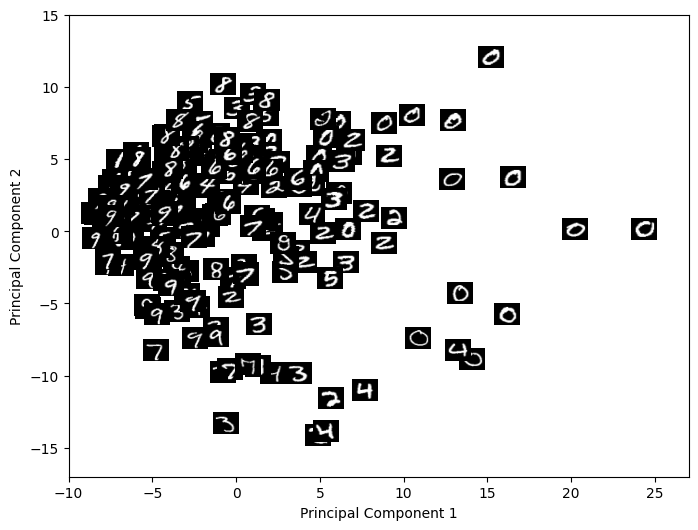

In [163]:
# Chiamare la funzione plot_pca_with_images per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA


# svolgimento...

plot_pca_with_images(X, newData, y)

## **PCA con scikit-learn**

Possiamo applicare la PCA anche utilizzando il pacchetto `scikit-learn`. Con quest' ultimo infatti l' intero processo visto precedentemente è parecchio semplificato. 

Gli step da seguire in questo caso sono:

1. **Caricare e standardizzare i dati**

2. **Applicare PCA**

3. **Calcolare la varianza espressa**

4. **Visualizzare i dati nel nuovo spazio**

## **Step 1 - Caricare e standardizzare i dati**

Per caricare i dati la procedura è uguale a quanto fatto in precedenza. Per quanto riguardala standardizzazione invece utilizzeremo direttamente l'oggetto di `scikit-learn`:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardizza i dati rimuovendo la media e scalandoli a varianza unitaria. 

In [164]:
# Carichiamo il dataset.
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data       
y = mnist.target.astype(int)  

# Inizializziamo un' istanza di `StandardScaler`, non è necessario specificare alcun parametro.
# svolgimento...

ss = StandardScaler()

# Utilizziamo lo scaler sui nostri dati. 
# Lo scaler possiede il medooto .fit_transform che utilizzeremo per scalare i dati. Questo metodo ha bisogno dei dati come parametro.

data2 = ss.fit_transform(X)
# svolgimento...

## **Step 2 - Applicare la PCA**

Per applicare la PCA utilizziamo direttamente l' implementazione di `scikit-learn`:

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): Implementazione di Principal Component Analysis (PCA) in `scikit-learn`.



In [165]:
# Istanziamo la classe PCA specificando come parametro il numero di componenti.
# Utilizziamo il metodo fit_transform della PCA per calcolarle

# svolgimento...

from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components)

newData2 = pca.fit_transform(data2)

## **Step 3 - Calcolare la varianza espressa**

L' oggetto PCA appena istanziato possiede un attributo che ci permette di valutare quanta varianza viene espressa:

- [PCA - explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) L' attributo `explained_variance_ratio_` nella PCA di `scikit-learn` ci da la varianza espressa dalla PCA.

In [166]:
# Estrarre e stampare la varianza espressa tramite l' attributo explained_variance_ratio_ della PCA.

# svolgimento

varianza2 = pca.explained_variance_ratio_
print(varianza2)

[0.05642719 0.04041226]


## **Step 4 - Visualizzare i dati nel nuovo spazio**

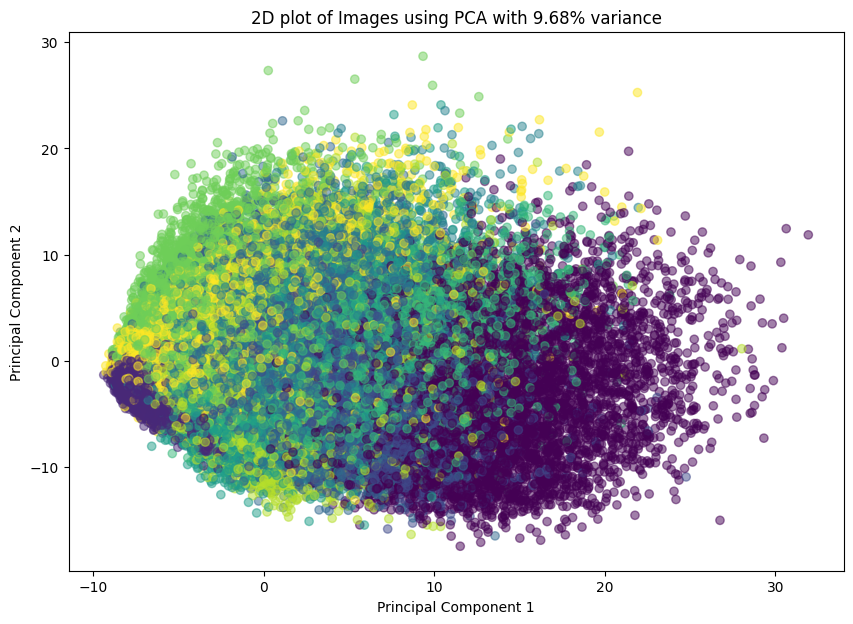

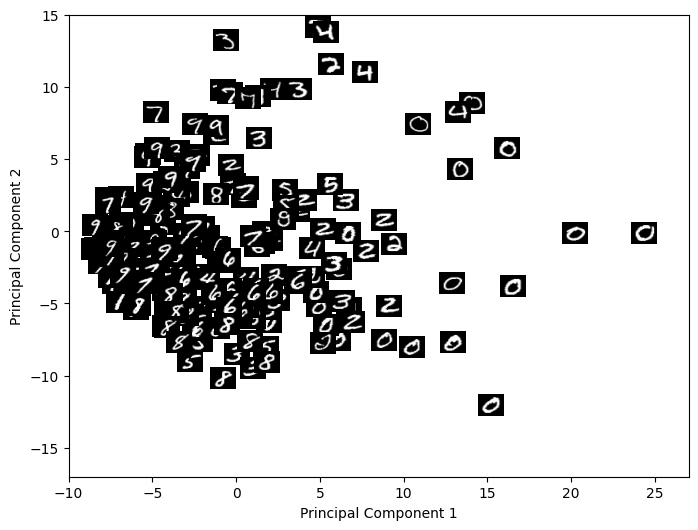

In [167]:
# Visualizziamo i risultati utilizzando le stesse funzioni viste in precedenza 

# svolgimento

plot_pca_2d(newData2, y, np.sum(varianza2))
plot_pca_with_images(X, newData2, y)